- Erics-MBP-3:Desktop Eric\$ mkdir dca-ls-analysis
- Erics-MBP-3:Desktop Eric\$ cd dca-ls-analysis
- Erics-MBP-3:dca-ls-analysis Eric$ virtualenv venv

In [62]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Pull data for spy, adj is dividend yield adjustee
start_date = datetime.datetime(2000, 1, 1) 
#start_date = datetime.datetime(1900, 1, 1) 
end_date = datetime.datetime(2020, 6, 19)
#end_date = datetime.datetime(2016, 1, 9)

spy_data = web.DataReader("SPY", "yahoo", start_date, end_date)

print(spy_data.tail()) # See first few rows

                  High         Low        Open       Close       Volume   Adj Close
Date                                                                               
2020-06-15  308.279999  296.739990  298.019989  307.049988  135782700.0  307.049988
2020-06-16  315.640015  307.670013  315.480011  312.959991  137627500.0  312.959991
2020-06-17  314.390015  310.859985  314.070007  311.660004   82954600.0  311.660004
2020-06-18  312.299988  309.510010  310.010010  311.779999   80443900.0  311.779999
2020-06-19  314.380005  307.209991  314.170013  308.640015  115310193.0  308.640015


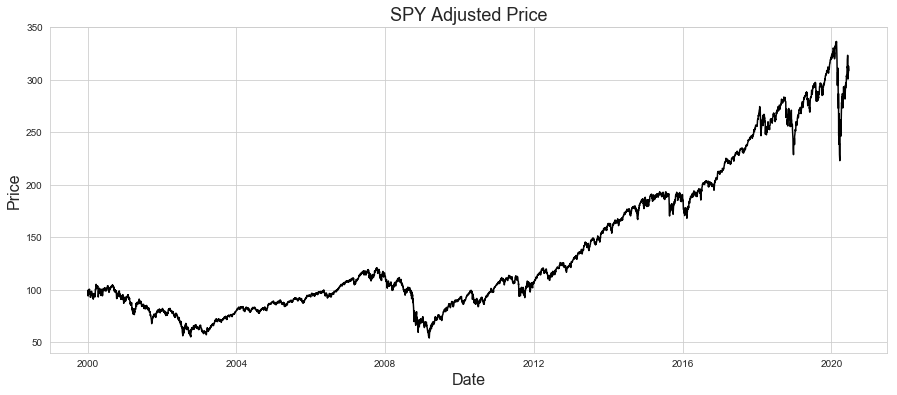

In [123]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

plt.plot(spy_data['Adj Close'], color='black')
plt.title('SPY Adjusted Price', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price' , fontsize=16)

plt.show()

In [124]:
def lumpsum(invest_date, principal=10000): 
    invest_price = spy_data.loc[invest_date]['Adj Close']
    current_price = spy_data['Adj Close'][-1]
    
    investment_return = (current_price / invest_price) -1
    
    return principal*(1+investment_return)
    
    
    

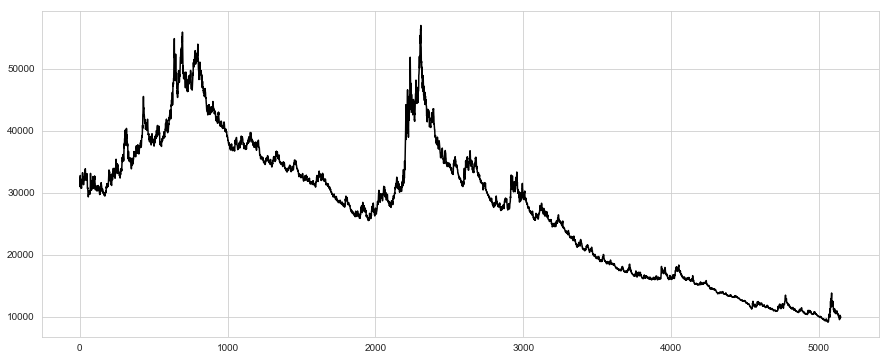

In [125]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

x = [lumpsum(x) for x in spy_data.index]
plt.plot(x, color='black')
plt.show()

#### for DCA
- get 10 dates
- for any ones past the end date, add principal / 12 to the cash reserves 
- for the remaingn dates, do sorted search
- call lump sum for each date, sum up, add to cash reserves if any 

In [126]:
def dollar_cost_average(invest_date, periods=12, freq='30D', principal=10000): 
    
    # Get DCA dates
    dca_dates =  investment_dates_all = pd.date_range(invest_date, periods=periods, freq=freq)
    
    # Filter out ones past the last data day
    dca_dates = dca_dates[dca_dates < spy_data.index[-1]]
    
    # Figure out how many dates we cut off
    cut_off_count = 12 - len(dca_dates)

    # Amount you have in cash and not the market
    value = cut_off_count*(principal/periods)
    
    for date in dca_dates:
        # Get an actual trading day
        trading_date = spy_data.index[spy_data.index.searchsorted(date)]

        # Calculate lumpsum value if invested on that date, add to value
        value += lumpsum(trading_date, principal= principal/periods)
    
    return value
    
            
    
    

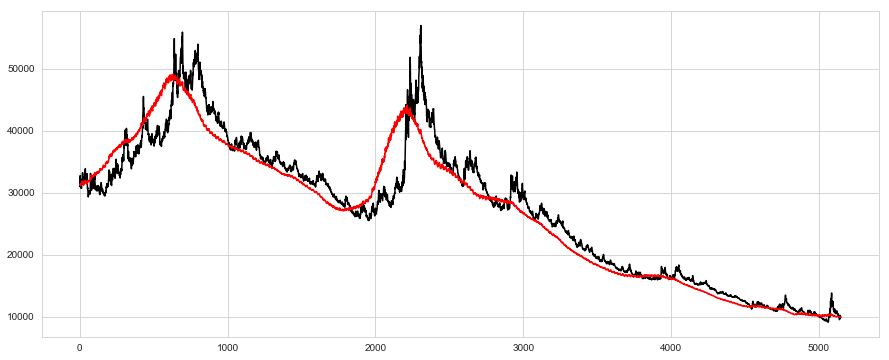

In [127]:

sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))


y = [lumpsum(x) for x in spy_data.index]
x = [dollar_cost_average(i) for i in spy_data.index]

plt.plot(y, color='black')
plt.plot(x, color='red')


plt.show()

In [78]:
spy_data.index[-1]

Timestamp('2016-01-08 00:00:00')

In [100]:
dates = pd.date_range('4/1/2020', periods=12, freq='30D')
print(dates)
dates = dates[dates < '6/19/2025']
len(dates)
12-len(dates)

DatetimeIndex(['2020-04-01', '2020-05-01', '2020-05-31', '2020-06-30', '2020-07-30', '2020-08-29', '2020-09-28', '2020-10-28', '2020-11-27', '2020-12-27', '2021-01-26', '2021-02-25'], dtype='datetime64[ns]', freq='30D')


0

In [93]:
dates[2]

Timestamp('2020-05-31 00:00:00', freq='30D')

In [98]:
dates = pd.date_range('4/1/2020', periods=12, freq='30D')
print(dates)
print(dates.searchsorted('7/15/2020', side='left'))
dates[dates.searchsorted('7/15/2020', side='left')]

DatetimeIndex(['2020-04-01', '2020-05-01', '2020-05-31', '2020-06-30', '2020-07-30', '2020-08-29', '2020-09-28', '2020-10-28', '2020-11-27', '2020-12-27', '2021-01-26', '2021-02-25'], dtype='datetime64[ns]', freq='30D')
4


Timestamp('2020-07-30 00:00:00', freq='30D')